In [2]:
from __future__ import annotations

import ast
import typing as T
import collections.abc as C

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes

In [3]:
def load_dataset(filepath: str) -> pd.DataFrame:
    def parse_values(x: pd.Series) -> pd.Series:
        keys = ast.literal_eval(x.loc["keys"])[0]
        values = (
            float(x) if x != "null" else pd.NA
            for x in ast.literal_eval(x.loc["values"])[0]
        )
        return pd.Series(dict(zip(keys, values)))

    df = pd.read_csv(filepath, parse_dates=[2], index_col=2).sort_index()
    values = df.apply(parse_values, axis=1)
    df = pd.concat([df[["id"]], values], axis=1)
    return df.convert_dtypes()

In [33]:
X_train = load_dataset("data/train999.csv")
X_test = load_dataset("data/test999.csv")

X_train.info()
X_train

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1940 entries, 2024-05-12 09:30:00 to 2024-06-30 16:00:01
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1940 non-null   Int64  
 1   meteo_layer_type      1856 non-null   Float64
 2   meteo_cloudiness      1940 non-null   Int64  
 3   meteo_wind_velocity   1940 non-null   Float64
 4   meteo_humidity        1940 non-null   Float64
 5   meteo_t_underroad     1940 non-null   Float64
 6   meteo_freezing_point  1856 non-null   Float64
 7   meteo_wind_direction  1940 non-null   Int64  
 8   meteo_dew_point       1940 non-null   Float64
 9   meteo_t_road          1940 non-null   Float64
 10  meteo_wind_gusts      1940 non-null   Float64
 11  meteo_t_air           1940 non-null   Float64
 12  meteo_air_pressure    1940 non-null   Int64  
dtypes: Float64(9), Int64(4)
memory usage: 236.8 KB


,id,meteo_layer_type,meteo_cloudiness,meteo_wind_velocity,meteo_humidity,meteo_t_underroad,meteo_freezing_point,meteo_wind_direction,meteo_dew_point,meteo_t_road,meteo_wind_gusts,meteo_t_air,meteo_air_pressure
ts,,,,,,,,,,,,,
2024-05-12 09:30:00,0,<NA>,3,4.0,20.0,30.1,<NA>,239,-5.4,26.8,8.0,17.9,746
2024-05-12 10:00:00,1,1.0,3,3.7,19.2,29.0,0.0,297,-5.9,26.2,7.2,17.9,746
2024-05-12 10:30:01,1751,1.0,2,5.0,71.7,20.0,0.0,33,-4.5,24.9,12.3,0.0,745
2024-05-12 11:00:00,2,1.0,3,4.1,20.6,26.0,0.0,266,-5.7,24.5,6.2,17.1,746
2024-05-12 12:00:00,3,1.0,3,2.0,27.8,22.7,0.0,266,-4.0,22.3,3.7,14.3,746
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30 12:30:00,2766,1.0,3,2.6,29.4,41.8,0.0,351,-15.8,45.9,6.5,0.0,749
2024-06-30 13:30:01,1746,1.0,2,1.0,84.5,29.2,0.0,248,18.0,29.0,1.4,20.7,732
2024-06-30 14:00:01,1747,1.0,3,0.9,87.0,28.3,0.0,275,17.5,28.3,2.1,19.8,732


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

<Axes: xlabel='ts'>

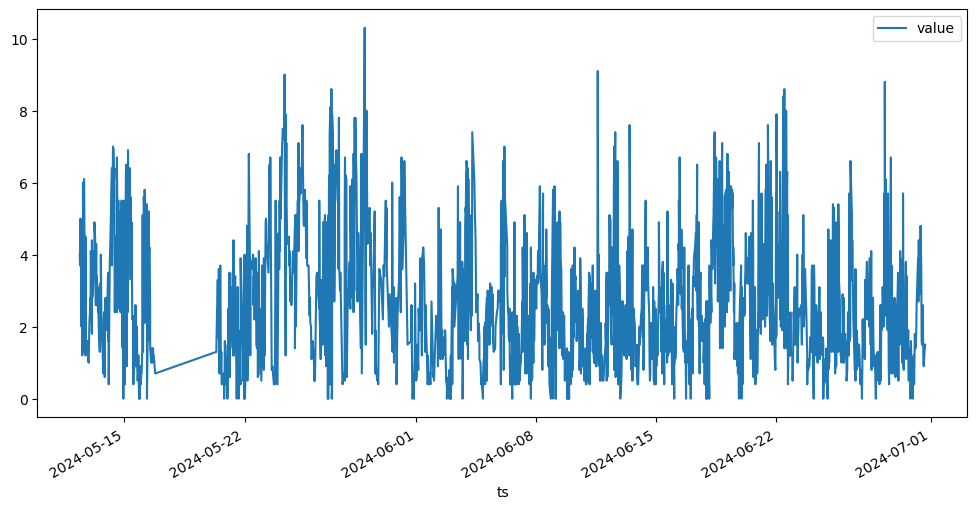

In [35]:
df = pd.DataFrame(X_train["meteo_wind_velocity"].rename("value"))
df.plot(figsize=(12, 6))

In [36]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df.values.reshape(-1, 1)) # type: ignore
data = pd.DataFrame(scaled)

model = IsolationForest(contamination="auto")
model.fit(data)

df["anomaly"] = model.predict(data)
df["anomaly"].value_counts()

anomaly
 1    1211
-1     729
Name: count, dtype: int64

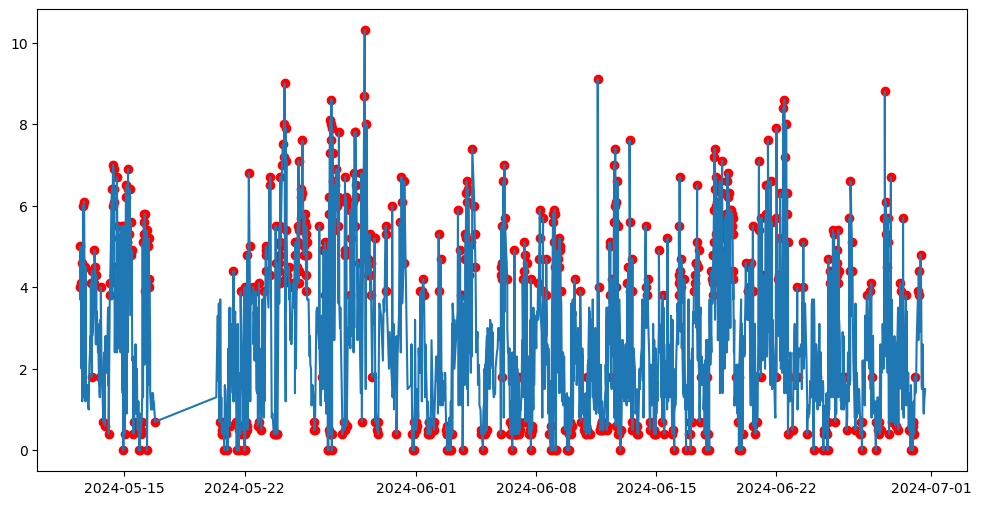

In [38]:
ap = df
# ap = df.loc["2024-06-01":"2024-06-02"]

fig, ax = plt.subplots(figsize=(12, 6))
a = ap.loc[ap["anomaly"] == -1, ["value"]]

ax.plot(ap.index, ap["value"], label="normal")
ax.scatter(a.index, a["value"], color="red", label="Anomaly")

In [9]:
def detect_anomalies(df: pd.DataFrame, *, contamination: str | float = "auto"):
    df = df.copy()
    for name, s in df.items():
        if name == "id" or s.isna().sum() > 0:
            continue
            
        scaler = StandardScaler()
        scaled = scaler.fit_transform(s.values.reshape(-1, 1)) # type: ignore
        data = pd.DataFrame(scaled)
        
        model = IsolationForest(contamination=contamination)
        model.fit(data)

        df[f"anomaly_{name}"] = model.predict(data)
    
    return df

In [10]:
df = detect_anomalies(X_train)
df

,id,meteo_layer_type,meteo_cloudiness,meteo_wind_velocity,meteo_humidity,meteo_t_underroad,meteo_freezing_point,meteo_wind_direction,meteo_dew_point,meteo_t_road,...,anomaly_meteo_cloudiness,anomaly_meteo_wind_velocity,anomaly_meteo_humidity,anomaly_meteo_t_underroad,anomaly_meteo_wind_direction,anomaly_meteo_dew_point,anomaly_meteo_t_road,anomaly_meteo_wind_gusts,anomaly_meteo_t_air,anomaly_meteo_air_pressure
ts,,,,,,,,,,,,,,,,,,,,,
2024-05-12 09:30:00,0,<NA>,3,4.0,20.0,30.1,<NA>,239,-5.4,26.8,...,1,-1,-1,1,1,1,1,-1,1,1
2024-05-12 10:00:00,1,1.0,3,3.7,19.2,29.0,0.0,297,-5.9,26.2,...,1,1,-1,1,1,1,1,1,1,1
2024-05-12 10:30:01,1751,1.0,2,5.0,71.7,20.0,0.0,33,-4.5,24.9,...,1,-1,1,1,-1,1,1,-1,1,1
2024-05-12 11:00:00,2,1.0,3,4.1,20.6,26.0,0.0,266,-5.7,24.5,...,1,-1,-1,1,1,1,1,1,1,1
2024-05-12 12:00:00,3,1.0,3,2.0,27.8,22.7,0.0,266,-4.0,22.3,...,1,1,-1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-30 12:30:00,2766,1.0,3,2.6,29.4,41.8,0.0,351,-15.8,45.9,...,1,1,-1,-1,-1,-1,-1,1,1,1
2024-06-30 13:30:01,1746,1.0,2,1.0,84.5,29.2,0.0,248,18.0,29.0,...,1,1,1,1,1,1,1,1,-1,-1
2024-06-30 14:00:01,1747,1.0,3,0.9,87.0,28.3,0.0,275,17.5,28.3,...,1,1,1,1,1,1,1,1,1,-1


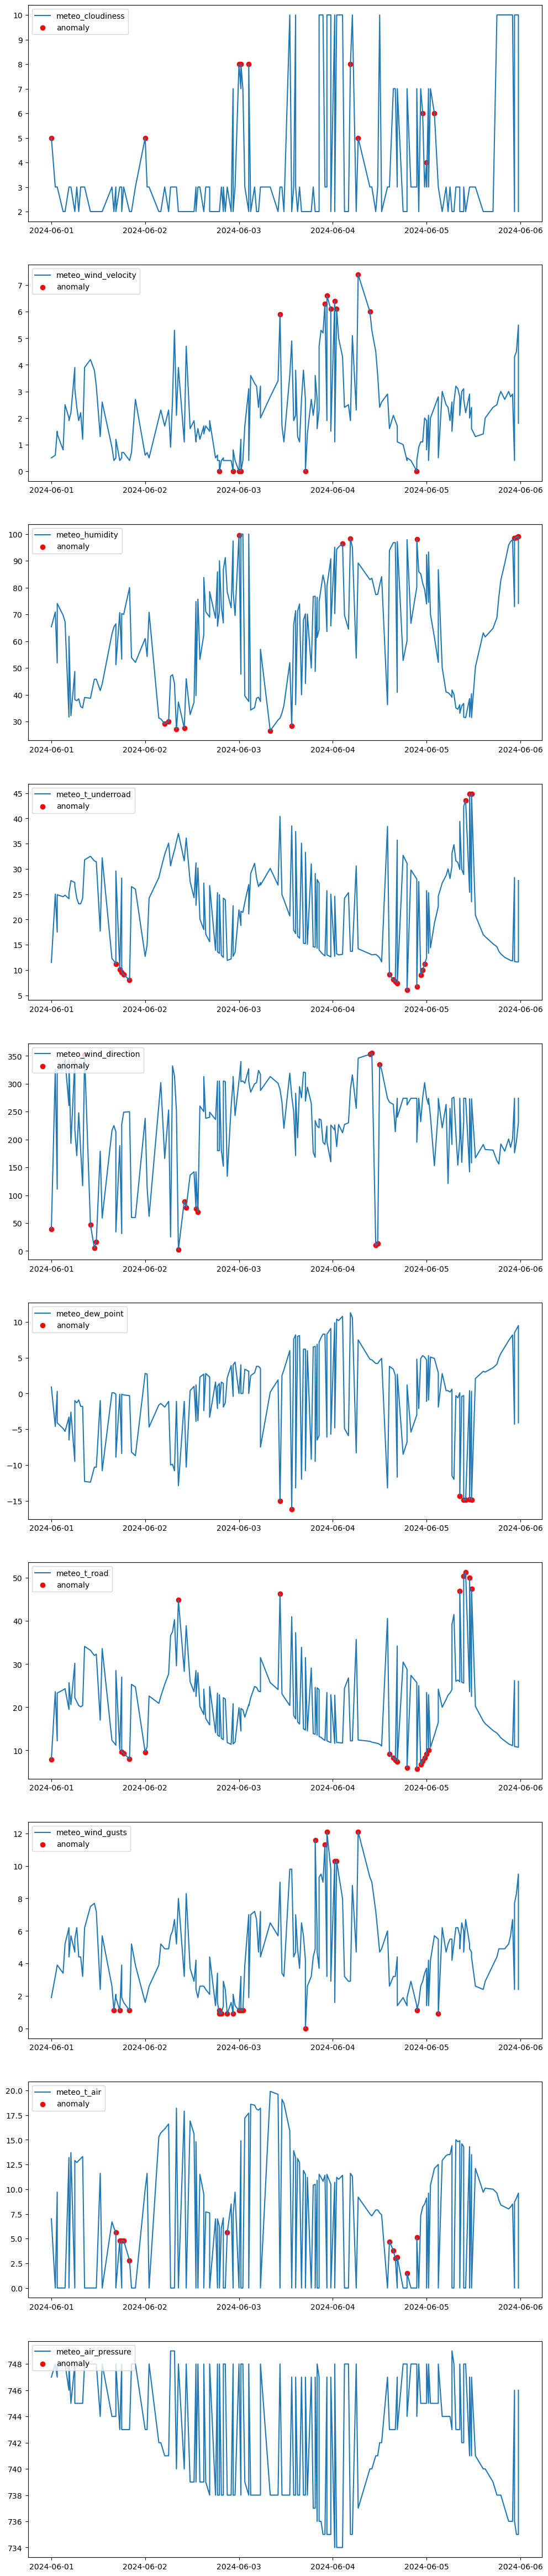

In [11]:
df = detect_anomalies(X_train, contamination=0.1)

anomaly_cols = [x for x in df.columns if x.startswith("anomaly")]
plot_count = len(anomaly_cols)

fig, axes = plt.subplots(plot_count, figsize=(12, 6 * plot_count))
axes = axes.flat
axes = T.cast(C.Sequence[Axes], axes)

df = df.loc["2024-06-01":"2024-06-05"]

for anomaly_name, ax in zip(anomaly_cols, axes):
    col = anomaly_name[len("anomaly_"):]
    a = df.loc[df[anomaly_name] == -1, [col]]

    ax.plot(df.index, df[col], label=col)
    ax.scatter(a.index, a[col], color="red", label="anomaly")
    ax.legend(loc="upper left")

In [12]:
anomaly_cols = [x for x in df.columns if x.startswith("anomaly")]
skipped_cols = [
    c for c in X_train.columns if c != "id" and f"anomaly_{c}" not in anomaly_cols
]

for col in skipped_cols:
    df[f"anomaly_{col}"] = df[col].isna().map({True: -1, False: 1})

skipped_cols

['meteo_layer_type', 'meteo_freezing_point']

In [13]:
non_anomaly_cols = [
    x for x in df.columns if not x.startswith("anomaly") and x != "id"
]
sorted_anomaly_cols = sorted(
    (x for x in df.columns if x.startswith("anomaly")),
    key=lambda a: non_anomaly_cols.index(a[len("anomaly_") :]),
)
sorted_anomaly_cols

['anomaly_meteo_layer_type',
 'anomaly_meteo_cloudiness',
 'anomaly_meteo_wind_velocity',
 'anomaly_meteo_humidity',
 'anomaly_meteo_t_underroad',
 'anomaly_meteo_freezing_point',
 'anomaly_meteo_wind_direction',
 'anomaly_meteo_dew_point',
 'anomaly_meteo_t_road',
 'anomaly_meteo_wind_gusts',
 'anomaly_meteo_t_air',
 'anomaly_meteo_air_pressure']

In [14]:
result = df[["id", *sorted_anomaly_cols]].set_index("id")
result = result.replace({1: 0, -1: 1})
result

,anomaly_meteo_layer_type,anomaly_meteo_cloudiness,anomaly_meteo_wind_velocity,anomaly_meteo_humidity,anomaly_meteo_t_underroad,anomaly_meteo_freezing_point,anomaly_meteo_wind_direction,anomaly_meteo_dew_point,anomaly_meteo_t_road,anomaly_meteo_wind_gusts,anomaly_meteo_t_air,anomaly_meteo_air_pressure
id,,,,,,,,,,,,
494,0,1,0,0,0,0,1,0,1,0,0,0
2080,0,0,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,0,0
2081,0,0,0,0,0,0,0,0,0,0,0,0
2082,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2179,0,0,0,0,0,0,0,0,0,0,0,0
666,0,0,0,1,0,0,0,0,0,0,0,0
667,0,0,0,1,0,0,0,0,0,0,0,0


In [15]:
result["target"] = result.agg(lambda x: "[%s]" % ", ".join(map(str, x)), axis=1)
result["target"].to_csv("out/targets-train-isolation-1.csv")

In [28]:
def fill_skipped(df: pd.DataFrame):
    df = df.copy()
    skipped_cols = [
        c
        for c in df.columns
        if c != "id"
        and not c.startswith("anomaly")
        and f"anomaly_{c}" not in df.columns
    ]
    for col in skipped_cols:
        df[f"anomaly_{col}"] = df[col].isna().map({True: -1, False: 1})
    return df

def compile_results(df: pd.DataFrame):
    non_anomaly_cols = [
        x for x in df.columns if not x.startswith("anomaly") and x != "id"
    ]
    sorted_anomaly_cols = sorted(
        (x for x in df.columns if x.startswith("anomaly")),
        key=lambda a: non_anomaly_cols.index(a[len("anomaly_") :]),
    )
    result = df[["id", *sorted_anomaly_cols]].set_index("id")
    result = result.replace({1: 0, -1: 1})
    result["target"] = result.agg(lambda x: "[%s]" % ", ".join(map(str, x)), axis=1)
    return result

In [29]:
anomalies = detect_anomalies(X_test)
anomalies.columns

Index(['id', 'meteo_layer_type', 'meteo_cloudiness', 'meteo_wind_velocity',
       'meteo_humidity', 'meteo_t_underroad', 'meteo_freezing_point',
       'meteo_wind_direction', 'meteo_dew_point', 'meteo_t_road',
       'meteo_wind_gusts', 'meteo_t_air', 'meteo_air_pressure',
       'anomaly_meteo_cloudiness', 'anomaly_meteo_wind_velocity',
       'anomaly_meteo_humidity', 'anomaly_meteo_t_underroad',
       'anomaly_meteo_wind_direction', 'anomaly_meteo_dew_point',
       'anomaly_meteo_t_road', 'anomaly_meteo_wind_gusts',
       'anomaly_meteo_t_air', 'anomaly_meteo_air_pressure'],
      dtype='object')

In [30]:
anomalies = fill_skipped(anomalies)
anomalies.columns

Index(['id', 'meteo_layer_type', 'meteo_cloudiness', 'meteo_wind_velocity',
       'meteo_humidity', 'meteo_t_underroad', 'meteo_freezing_point',
       'meteo_wind_direction', 'meteo_dew_point', 'meteo_t_road',
       'meteo_wind_gusts', 'meteo_t_air', 'meteo_air_pressure',
       'anomaly_meteo_cloudiness', 'anomaly_meteo_wind_velocity',
       'anomaly_meteo_humidity', 'anomaly_meteo_t_underroad',
       'anomaly_meteo_wind_direction', 'anomaly_meteo_dew_point',
       'anomaly_meteo_t_road', 'anomaly_meteo_wind_gusts',
       'anomaly_meteo_t_air', 'anomaly_meteo_air_pressure',
       'anomaly_meteo_layer_type', 'anomaly_meteo_freezing_point'],
      dtype='object')

In [32]:
results = compile_results(anomalies)
results["target"].to_csv("out/targets-test-isolation-1.csv")